## Las correrías de Rafaela y Adolfo 

Rafaela lleva semanas sintiendo que Adolfo la viene tratando diferente; con algo de desidia y con comportamientos inusuales. Por esto, usando un programa que compró en Unilago, ha descargado los datos de los últimos tres meses de las dos SIM-Cards de Adolfo (personal y corporativa), así como los extractos de su tarjeta de crédito (un día que él dejó su computador desatendido), y un registro de llamadas de la factura del celular.

En esta carpeta Usted encontrará los archivos:
* "evidencia/WApp_Corporativo.csv"
* "evidencia/WApp_Personal.csv"
* "evidencia/DatosFacturaMovistar.csv"
* "evidencia/Municipios.xls"
* "evidencia/TarjetaCred.csv"

Rafaela ha tomado clases de python y quiere ser data scientist, veamos si lo que ha aprendido hasta el momento en esas clases sirve de algo...

### Episodio 1: 

#### ¿Será que habla con otra? ¿Cuánto lleva en esas?

"Este guache sí es desatento, pero no tanto. ¿Por qué anda tan alejado? Miremos el WhatsApp..."

##### (A) El WhatsApp Personal

In [1]:
import pandas as pd
import seaborn as sb

file = "evidencia/WApp_Personal.csv" # Uno puede guardar en una varible la dirección, y usarla para llamarla.
WA_Person = pd.read_csv(file)

# Usar ".head()" o ".columns" para inspeccionar columnas
WA_Person.head()

,Unnamed: 0,LastSeen
0,0,2018-06-10 08:29:00
1,1,2018-06-10 10:17:00
2,2,2018-06-10 12:29:00
3,3,2018-06-10 14:10:00
4,4,2018-06-10 16:21:00


In [2]:
# Hay una columna de ruido (Solo importa "LastSeen"). Retirar:
WA_Person.drop( ["Unnamed: 0"], axis=1, inplace=True) # Borra la columna. con axis= 1 decimos que es columna. 
WA_Person.head()

,LastSeen
0,2018-06-10 08:29:00
1,2018-06-10 10:17:00
2,2018-06-10 12:29:00
3,2018-06-10 14:10:00
4,2018-06-10 16:21:00


In [3]:
WA_Person.tail()

,LastSeen
298,2018-08-20 13:47:00
299,2018-08-20 17:27:00
300,2018-08-21 07:43:00
301,2018-08-21 13:24:00
302,2018-08-21 17:15:00


In [4]:
# Use ".dtypes" para asegurarse que los datos están en formato correcto
WA_Person.dtypes

LastSeen    object
dtype: object

In [5]:
# Tipo object es texto. Cambiar a "datetime"
WA_Person["LastSeen"] = pd.to_datetime(WA_Person["LastSeen"]) # Volverlo formato tiempo.
WA_Person.dtypes

LastSeen    datetime64[ns]
dtype: object

##### Voila

Finalmente tenemos los datos limpios. Ahora ¿qué hacer con ellos? Con lo poco que hay, miremos a qué horas se conecta/desconecta Adolfo regularmente.

Para esto deberíamos tomar los objetos tipo DateTime de "LastSeen" y **separar la fecha de la hora**. Quizá **enviar la fecha al índice del DataFrame** y conservar una columna con las horas de desconexión.

In [30]:
import datetime as dt

# Crear una columna tipo float con la hora en decimales (combinando horas y minutos)
# con .dt.hour, toma las horas y con .minute los minutos.
WA_Person["Hora"] = pd.to_datetime(WA_Person["LastSeen"]).dt.hour + (1.0/60)*pd.to_datetime(WA_Person["LastSeen"]).dt.minute
WA_Person.head()

,LastSeen,Hora
0,2018-06-10 08:29:00,8.483333
1,2018-06-10 10:17:00,10.283333
2,2018-06-10 12:29:00,12.483333
3,2018-06-10 14:10:00,14.166667
4,2018-06-10 16:21:00,16.350000


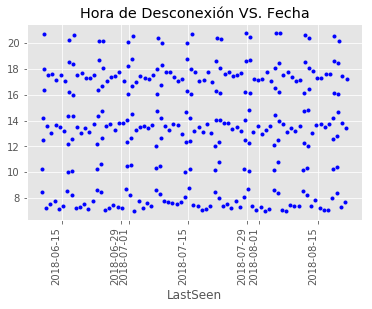

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Dibujar Hora de Desconexión contra Fecha
WA_Person.plot(x="LastSeen", y="Hora", style='.', color='b', legend=False)
plt.xticks(rotation=90)
plt.title("Hora de Desconexión VS. Fecha")
plt.show()

##### (B) El WhatsApp Corporativo

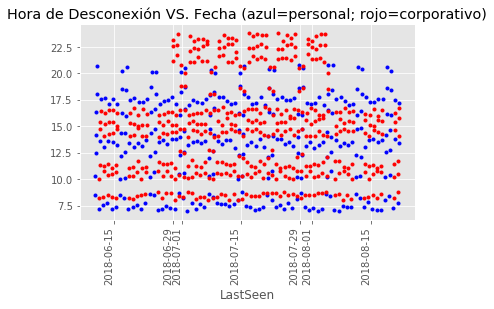

In [8]:
file = "evidencia/WApp_Corporativo.csv"
WA_Corp = pd.read_csv(file)
WA_Corp.drop( ["Unnamed: 0"], axis=1, inplace=True)
WA_Corp["LastSeen"] = pd.to_datetime(WA_Corp["LastSeen"])
WA_Corp["Hora"] = pd.to_datetime(WA_Corp["LastSeen"]).dt.hour + (1.0/60)*pd.to_datetime(WA_Corp["LastSeen"]).dt.minute

ax1 = WA_Person.plot(x="LastSeen", y="Hora", style='.', color='b', legend=False)
WA_Corp.plot(x="LastSeen", y="Hora", style='.', color='r', ax=ax1, legend=False)
plt.xticks(rotation=90)
plt.title("Hora de Desconexión VS. Fecha (azul=personal; rojo=corporativo)")
plt.show()

"¡Este troglodita se pasó julio de puro trasnocho hablando con alguna suripanta por el WA de la oficina!"

### Episodio 2:

#### ¿Será solo coqueteo o están haciendo algo?

Miremos las llamadas

In [9]:
file = "evidencia/DatosFacturaMovistar.csv"

Cel = pd.read_csv(file)
Cel.drop( ["Unnamed: 0"], axis=1, inplace=True)
Cel.head()

,CodeAntena,Duracion,Hora,NumeroDestino
0,1100135869,0 days 00:04:00.000000000,2018-06-01 13:07:00,311.487.6976
1,1100187368,0 days 00:02:00.000000000,2018-06-01 18:54:00,311.487.6976
2,1100162399,0 days 00:02:00.000000000,2018-06-01 13:20:00,311.487.6976
3,1100187105,0 days 00:05:00.000000000,2018-06-01 12:30:00,315.777.6549
4,1100187198,0 days 00:04:00.000000000,2018-06-01 17:30:00,300.227.8739


"Nada raro con los números; son todos de la familia."

[Llamada a un amigo]

Resulta que los códigos de las antenas funcionan así:

Si se tiene "WWXXXYYZZZ", entonces:

* 'WW': Departamento
* 'XXX': Municipio
* 'YY': Operador
* 'ZZZ': Localización antena

In [10]:
# Remover columnas inútiles
Cel.drop( ["Duracion"], axis=1, inplace=True)

# Corroborar tipos
print(Cel.dtypes) # Para saber que tipo de dato es
print("\n")

# Arreglar tipos
Cel["CodeAntena"] = Cel["CodeAntena"].astype(str) # Volver los datos de la columna un str.
print(Cel.dtypes)

# Tomar solo el pedazo de CodeAntena referente a Departamento y Municipio
Cel["DeptoMuni"] = Cel["CodeAntena"].apply(lambda x: x[:5]) # Coja el Codigo Antena y utilice los primeros 5 números.
Cel.head()

CodeAntena        int64
Hora             object
NumeroDestino    object
dtype: object


CodeAntena       object
Hora             object
NumeroDestino    object
dtype: object


,CodeAntena,Hora,NumeroDestino,DeptoMuni
0,1100135869,2018-06-01 13:07:00,311.487.6976,11001
1,1100187368,2018-06-01 18:54:00,311.487.6976,11001
2,1100162399,2018-06-01 13:20:00,311.487.6976,11001
3,1100187105,2018-06-01 12:30:00,315.777.6549,11001
4,1100187198,2018-06-01 17:30:00,300.227.8739,11001


In [11]:
# Cargae base de municipios para comparar
muni = pd.read_excel("evidencia/Municipios.xls")
muni.head(10)

,RESULTADOS CENSO GENERAL 2005,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,"Necesidades Básicas Insatisfechas - NBI, por t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Código Deapartamento,Nombre Departamento,Código Municipio,Nombre Municipio,Personas en NBI,NaN,NaN,NaN,NaN,NaN,Nota Aclaratoria
3,NaN,NaN,NaN,NaN,Cabecera,NaN,Resto,NaN,Total,NaN,NaN
4,NaN,NaN,NaN,NaN,Prop (%),cve (%),Prop (%),cve (%),Prop (%),cve (%),NaN
5,05,ANTIOQUIA,001,MEDELLIN,12.3268,2.7051,18.2782,13.4735,12.4241,2.65985,NaN
6,05,ANTIOQUIA,002,ABEJORRAL,30.2623,-,35.4747,-,33.8511,-,NaN
7,05,ANTIOQUIA,004,ABRIAQUI,11.5207,-,35.9043,-,28.5383,-,NaN
8,05,ANTIOQUIA,021,ALEJANDRIA,24.0323,-,42.2497,-,33.1361,-,NaN
9,05,ANTIOQUIA,030,AMAGA,21.5915,6.13862,33.0118,7.28243,27.069,4.9636,NaN


In [12]:
muni.columns

Index(['RESULTADOS CENSO GENERAL 2005', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [13]:
muni.iloc[2,:]

RESULTADOS CENSO GENERAL 2005    Código Deapartamento
Unnamed: 1                        Nombre Departamento
Unnamed: 2                           Código Municipio
Unnamed: 3                           Nombre Municipio
Unnamed: 4                            Personas en NBI
Unnamed: 5                                        NaN
Unnamed: 6                                        NaN
Unnamed: 7                                        NaN
Unnamed: 8                                        NaN
Unnamed: 9                                        NaN
Unnamed: 10                          Nota Aclaratoria
Name: 2, dtype: object

In [14]:
# El archivo original es un desastre; tomar nombres de columnas con base en la fila 2
muni.columns = muni.iloc[2,:]

# Alternativa a "head" (más general; indexa filas y columnas)
muni.iloc[0:7,:]

2,Código Deapartamento,Nombre Departamento,Código Municipio,Nombre Municipio,Personas en NBI,nan,nan,nan,nan,nan,Nota Aclaratoria
0,"Necesidades Básicas Insatisfechas - NBI, por t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Código Deapartamento,Nombre Departamento,Código Municipio,Nombre Municipio,Personas en NBI,NaN,NaN,NaN,NaN,NaN,Nota Aclaratoria
3,NaN,NaN,NaN,NaN,Cabecera,NaN,Resto,NaN,Total,NaN,NaN
4,NaN,NaN,NaN,NaN,Prop (%),cve (%),Prop (%),cve (%),Prop (%),cve (%),NaN
5,05,ANTIOQUIA,001,MEDELLIN,12.3268,2.7051,18.2782,13.4735,12.4241,2.65985,NaN
6,05,ANTIOQUIA,002,ABEJORRAL,30.2623,-,35.4747,-,33.8511,-,NaN


In [15]:
# desechar filas basura y renombrar columnas
muni.drop( muni.index[[0,1,2,3,4,1125]], inplace=True )
muni = muni[["Código Deapartamento","Nombre Departamento","Código Municipio","Nombre Municipio"]]

reemplazo = {"Código Deapartamento":"Cod_Depto",
             "Nombre Departamento":"Depto",
             "Código Municipio":"Cod_Muni",
             "Nombre Municipio":"Muni"} # Puedo utilizar un diccionario para asignar los nombres de las variables.

muni.rename(columns=reemplazo, inplace=True) # Así cambio los nombres.
muni.head()

2,Cod_Depto,Depto,Cod_Muni,Muni
5,05,ANTIOQUIA,001,MEDELLIN
6,05,ANTIOQUIA,002,ABEJORRAL
7,05,ANTIOQUIA,004,ABRIAQUI
8,05,ANTIOQUIA,021,ALEJANDRIA
9,05,ANTIOQUIA,030,AMAGA


In [16]:
# Convertir a string para comparar con Departamentos y Municipios del celular
muni["Cod_Depto"] = muni["Cod_Depto"].astype(str) # Lo guardo como String
muni["Cod_Muni"] = muni["Cod_Muni"].astype(str)

# Crear columna comparable 
# (Tanto Cel como Muni quedan con un "DeptoMuni" con codigos en string)
muni["DeptoMuni"] = muni[["Cod_Depto","Cod_Muni"]].apply(lambda x: ''.join(x), axis=1) # Une dos columnas. 
muni.head()

2,Cod_Depto,Depto,Cod_Muni,Muni,DeptoMuni
5,05,ANTIOQUIA,001,MEDELLIN,05001
6,05,ANTIOQUIA,002,ABEJORRAL,05002
7,05,ANTIOQUIA,004,ABRIAQUI,05004
8,05,ANTIOQUIA,021,ALEJANDRIA,05021
9,05,ANTIOQUIA,030,AMAGA,05030


In [41]:
# Para cada Codigo "DeptoMuni" que aparezca en el Cel, acumular filas que coincidan en "DeptoMuni" de muni
lista = []
for dm in Cel["DeptoMuni"].unique(): # Con unique me colapsa los datos, dejandome los no duplicados.
    lista.append( muni[ muni["DeptoMuni"] == dm ] )
lista

[2   Cod_Depto   Depto Cod_Muni          Muni DeptoMuni
 153        11  BOGOTA      001  BOGOTA, D.C.     11001,
 2   Cod_Depto    Depto Cod_Muni        Muni DeptoMuni
 455        23  CORDOBA      672  SAN ANTERO     23672]

In [17]:
# Uso más común de concat
pd.concat(lista) # Solo hay dos municipios. Bogotá y San Antero.

2,Cod_Depto,Depto,Cod_Muni,Muni,DeptoMuni
153,11,BOGOTA,001,"BOGOTA, D.C.",11001
455,23,CORDOBA,672,SAN ANTERO,23672


In [18]:
# Ahora sí: muéstreme las llamadas que tenían origen en San Antero
Cel[ Cel["DeptoMuni"]=='23672' ] # Filtro por el lugar de las llamadas.

,CodeAntena,Hora,NumeroDestino,DeptoMuni
409,2367262278,2018-08-03 17:34:00,311.487.6976,23672
410,2367235377,2018-08-03 21:32:00,315.777.6549,23672
411,2367262534,2018-08-03 21:55:00,315.777.6549,23672
412,2367262818,2018-08-03 08:09:00,300.227.8739,23672
413,2367262609,2018-08-03 07:39:00,311.487.6976,23672
414,2367262437,2018-08-04 13:30:00,315.777.6549,23672
415,2367262557,2018-08-04 12:20:00,301.009.5672,23672
416,2367262264,2018-08-04 08:08:00,301.009.5672,23672
417,2367262571,2018-08-05 21:06:00,301.009.5672,23672
418,2367287325,2018-08-05 08:33:00,315.777.6549,23672


"¡Pero este vergajo que hace en San Antero! 

Todo el verraco fin de semana del 3 al 5 de agosto que me dijo que se iba de seminario de la empresa.

¡Es que me va a oir!" 


### Episodio 3: ¡¿Y con la platica de nosotros?!

In [19]:
file = "evidencia/TarjetaCred.csv"

# caragr datos extracto tarjeta
TCred = pd.read_csv(file)
TCred.drop( ["Unnamed: 0"], axis=1, inplace=True)
TCred.head()

,Concepto,Fecha/Hora,Valor
0,El Corral,2018-06-01 12:57:00,15000
1,El Pub,2018-06-01 22:01:00,22000
2,Uber,2018-06-01 22:57:00,12600
3,Falabella,2018-06-02 17:34:00,60000
4,CineColombia,2018-06-03 20:26:00,28000


Miremos a ver si es cuando se pierde los viernes que le da por hacer cosas raras.

In [5]:
# Utilizar dias y meses en español como referencia
dias = {0:"1. Lun",1:"2. Mar",2:"3. Mie",3:"4. Jue",4:"5. Vie",5:"6. Sab",6:"7. Dom"}
meses = {6:"Jun",7:"Jul",8:"Ago",9:"Sep"}

# La columna fecha hora viene como string y queremos analizarla como DATETIME
TCred["Fecha/Hora"] = pd.to_datetime(TCred["Fecha/Hora"]) # Utiliza en formato fecha la columna fecha/hora.

# Obtener día de la semana y mes a partir de objeto tipo DATETIME
# OJO: tanto weekday como month devuelven un entero (los mapeamos con "dias" y "meses")
TCred["DiaSemana"] = TCred["Fecha/Hora"].apply( lambda x: dias[ x.weekday() ] )
TCred["Mes"] = TCred["Fecha/Hora"].apply( lambda x: meses[ x.month ] )

TCred.head()

NameError: name 'pd' is not defined

In [3]:
dias = {0:"1. Lun",1:"2. Mar",2:"3. Mie",3:"4. Jue",4:"5. Vie",5:"6. Sab",6:"7. Dom"}
meses = {6:"Jun",7:"Jul",8:"Ago",9:"Sep"}


In [4]:
dias[ x.weekday() ]

NameError: name 'x' is not defined

In [21]:
# Pasar datetime a indice
TCred.set_index("Fecha/Hora", inplace=True) # Para poner algo como indice.
TCred.head()

,Concepto,Valor,DiaSemana,Mes
Fecha/Hora,,,,
2018-06-01 12:57:00,El Corral,15000,5. Vie,Jun
2018-06-01 22:01:00,El Pub,22000,5. Vie,Jun
2018-06-01 22:57:00,Uber,12600,5. Vie,Jun
2018-06-02 17:34:00,Falabella,60000,6. Sab,Jun
2018-06-03 20:26:00,CineColombia,28000,7. Dom,Jun


In [22]:
# GROUPBY: Muy importante para análisis.
Aux = TCred.groupby(["Mes","DiaSemana"]).mean() # Agrupa los días de cada mes
Aux

Valor
Mes DiaSemana               
Ago 1. Lun      13800.000000
    2. Mar      14200.000000
    3. Mie      13600.000000
    4. Jue      14000.000000
    5. Vie      16533.333333
    6. Sab      60000.000000
    7. Dom      28000.000000
Jul 1. Lun      13800.000000
    2. Mar     221833.333333
    3. Mie      13600.000000
    4. Jue     375200.000000
    5. Vie      16533.333333
    6. Sab      60000.000000
    7. Dom      28000.000000
Jun 1. Lun      13800.000000
    2. Mar      14200.000000
    3. Mie      13600.000000
    4. Jue      14000.000000
    5. Vie      16533.333333
    6. Sab      60000.000000
    7. Dom      28000.000000

In [23]:
# Stack y Unstack: importante al trabajar con multi-indices (i.e., dimensiones altas)
    # Stack es enviar columnas a indices
    # Unstack es enviar indices a columnas
Aux = Aux.unstack()
Aux

Valor                                                           \
DiaSemana   1. Lun         2. Mar   3. Mie    4. Jue        5. Vie   6. Sab   
Mes                                                                           
Ago        13800.0   14200.000000  13600.0   14000.0  16533.333333  60000.0   
Jul        13800.0  221833.333333  13600.0  375200.0  16533.333333  60000.0   
Jun        13800.0   14200.000000  13600.0   14000.0  16533.333333  60000.0   

                    
DiaSemana   7. Dom  
Mes                 
Ago        28000.0  
Jul        28000.0  
Jun        28000.0

In [24]:
Aux.columns = Aux.columns.droplevel()
Aux

DiaSemana,1. Lun,2. Mar,3. Mie,4. Jue,5. Vie,6. Sab,7. Dom
Mes,,,,,,,
Ago,13800.0,14200.000000,13600.0,14000.0,16533.333333,60000.0,28000.0
Jul,13800.0,221833.333333,13600.0,375200.0,16533.333333,60000.0,28000.0
Jun,13800.0,14200.000000,13600.0,14000.0,16533.333333,60000.0,28000.0


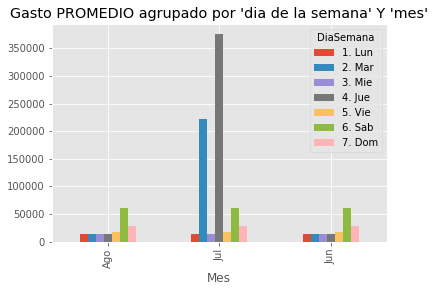

In [25]:
Aux.plot(kind='bar')
plt.title("Gasto PROMEDIO agrupado por 'dia de la semana' Y 'mes'")
plt.show()

"¡Cómo así que este tipo se estuvo gastando 200 o 300 mil pesos los martes y jueves de julio!

Muestre a ver en qué..."

In [26]:
# MUY ÚTIL: slicing basado en valores (y lógica)
TCred[ TCred["Valor"] > 200000 ] #Que día gasto más de 200000 

,Concepto,Valor,DiaSemana,Mes
Fecha/Hora,,,,
2018-07-17 15:35:00,Avianca,1260000,2. Mar,Jul
2018-07-19 11:08:00,Decameron,1820000,4. Jue,Jul


In [27]:
# MUY ÚTIL: operaciones sobre columnas
TCred["Valor"][ TCred["Valor"] > 200000].sum() # Cuanto sumas los montos de más de 200k

3080000

"¡Pero este desgraciado se gasta 3 millones en un paseo con una aparecida, con los ahorritos de nosotros!

¡Ténganme! Es que... ¡Ténganme!

Yo lo mato..."

[En efecto, la tuvieron]

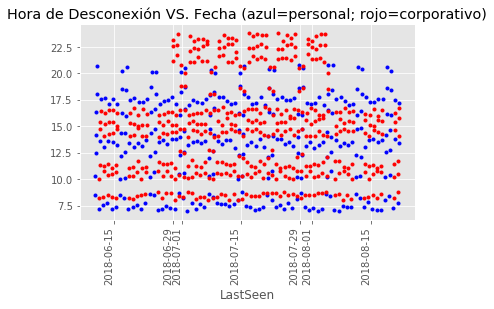

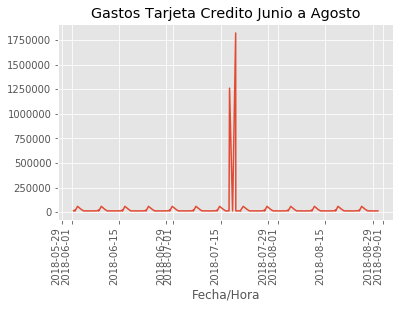

In [28]:
# Dibujos de resumen
ax1 = WA_Person.plot(x="LastSeen", y="Hora", style='.', color='b', legend=False)
WA_Corp.plot(x="LastSeen", y="Hora", style='.', color='r', ax=ax1, legend=False)
plt.title("Hora de Desconexión VS. Fecha (azul=personal; rojo=corporativo)")
plt.xticks(rotation=90)
plt.show()

TCred["Valor"].plot()
plt.title("Gastos Tarjeta Credito Junio a Agosto")
plt.xticks(rotation=90)
plt.show()


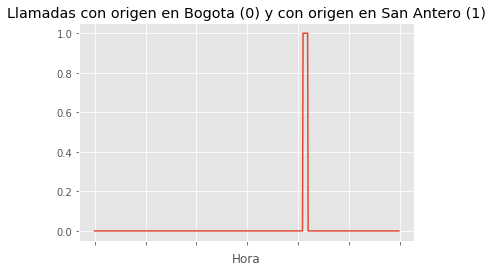

In [26]:
Cel["DeptoMuni"].replace(to_replace={'23672':1, '11001':0}, inplace=True)
Cel.set_index("Hora", inplace=True)
Cel["DeptoMuni"].plot()
plt.title("Llamadas con origen en Bogota (0) y con origen en San Antero (1)")
plt.show()

La empezó a enredar arrancando julio...

A fin de mes le compró paseo...

Se la llevó empezando agosto... 3 millones por un fin de semana que ni puente era.

¡Y ES TAN CONCHUDO QUE NI LE VOLVIÓ A COQUETEAR!

In [1]:
x.weekday()

NameError: name 'x' is not defined